# 4-2. Seaborn 기초

기본적인 분류 5가지의 기본적인 종류의 통계 시각화와 형태를 살펴봅시다.

- Categorical API
- Distribution API
- Relational API
- Regression API
- Matrix API


## 1. Seaborn의 구조 살펴보기

### 1-1. 라이브러리와 데이터셋 호출

In [3]:
!pip install seaborn

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

print('seaborn version : ', sns.__version__)

seaborn version :  0.11.2


In [5]:
train_pd = pd.read_csv('../data/stratified_train.csv')
train_pd.head()

,image_id,category_id,area,bbox,iscrowd,id,x_min,x_center,x_max,y_min,y_center,y_max,w,h
0,0,0,257301.66,"[197.6, 193.7, 547.8, 469.7]",0,0,197.6,471.50,745.4,193.7,428.55,663.4,547.8,469.7
1,1,3,10402.56,"[0.0, 407.4, 57.6, 180.6]",0,1,0.0,28.80,57.6,407.4,497.70,588.0,57.6,180.6
2,1,7,26259.36,"[0.0, 455.6, 144.6, 181.6]",0,2,0.0,72.30,144.6,455.6,546.40,637.2,144.6,181.6
3,1,4,69096.17,"[722.3, 313.4, 274.3, 251.9]",0,3,722.3,859.45,996.6,313.4,439.35,565.3,274.3,251.9
4,1,5,24164.58,"[353.2, 671.0, 233.7, 103.4]",0,4,353.2,470.05,586.9,671.0,722.70,774.4,233.7,103.4


In [67]:
valid_pd = pd.read_csv('../data/stratified_valid.csv')
train_pd.head()

,image_id,category_id,area,bbox,iscrowd,id,x_min,x_center,x_max,y_min,y_center,y_max,w,h,bbox_count,object_count,stratify_group,fold
0,0,0,257301.66,"[197.6, 193.7, 547.8, 469.7]",0,0,197.6,471.50,745.4,193.7,428.55,663.4,547.8,469.7,1,1,1_0,2
1,1,3,10402.56,"[0.0, 407.4, 57.6, 180.6]",0,1,0.0,28.80,57.6,407.4,497.70,588.0,57.6,180.6,8,5,5_0,2
2,1,7,26259.36,"[0.0, 455.6, 144.6, 181.6]",0,2,0.0,72.30,144.6,455.6,546.40,637.2,144.6,181.6,8,5,5_0,2
3,1,4,69096.17,"[722.3, 313.4, 274.3, 251.9]",0,3,722.3,859.45,996.6,313.4,439.35,565.3,274.3,251.9,8,5,5_0,2
4,1,5,24164.58,"[353.2, 671.0, 233.7, 103.4]",0,4,353.2,470.05,586.9,671.0,722.70,774.4,233.7,103.4,8,5,5_0,2


In [31]:
#column unique value 출력
for column_name in train_pd.columns:
    print(column_name, np.sort(train_pd[column_name].unique()))

image_id [   0    1    2 ... 4880 4881 4882]
category_id [0 1 2 3 4 5 6 7 8 9]
area [5.60000000e-01 3.12000000e+00 6.62500000e+01 ... 1.04622140e+06
 1.04796169e+06 1.04806406e+06]
bbox ['[0.0, 0.0, 1000.9, 1023.7]' '[0.0, 0.0, 1021.7, 1023.7]'
 '[0.0, 0.0, 1022.0, 1008.1]' ... '[998.6, 49.8, 25.1, 48.0]'
 '[998.9, 387.0, 24.7, 58.9]' '[999.1, 320.0, 24.6, 246.2]']
iscrowd [0]
id [    0     1     2 ... 23141 23142 23143]
x_min [0.0000e+00 3.0000e-01 7.0000e-01 ... 1.0098e+03 1.0110e+03 1.0113e+03]
x_center [   5.1     6.85    7.45 ... 1016.8  1017.35 1017.5 ]
x_max [  10.2   13.7   14.9 ... 1023.7 1023.8 1023.9]
y_min [0.0000e+00 3.0000e-01 5.0000e-01 ... 1.0098e+03 1.0100e+03 1.0115e+03]
y_center [   6.35    6.75    7.   ... 1016.8  1016.85 1017.6 ]
y_max [  12.7   13.5   14.  ... 1023.7 1023.8 1023.9]
w [7.0000e-01 1.3000e+00 7.1000e+00 ... 1.0236e+03 1.0237e+03 1.0238e+03]
h [8.0000e-01 2.4000e+00 5.3000e+00 ... 1.0235e+03 1.0237e+03 1.0238e+03]
bbox_count [ 1  2  3  4  5  6  7  8  

### 1-2. Countplot으로 살펴보는 공통 파라미터

`countplot`은 seaborn의 Categorical API에서 대표적인 시각화로 범주를 이산적으로 세서 막대 그래프로 그려주는 함수입니다.

기본적으로 다음과 같은 파라미터가 있습니다. 설명에서 말하는 df는 pandas의 DataFrame을 의미합니다.

- `x` 
- `y`
- `data`
- `hue`
    - `hue_order`
- `palette`
- `color`
- `saturate`
- `ax`

이 중 `x`, `y`, `hue` 등은 기본적으로 `df`의 feature를 의미합니다. `dict`라면 key를 의미합니다.

<AxesSubplot:xlabel='category_id', ylabel='count'>

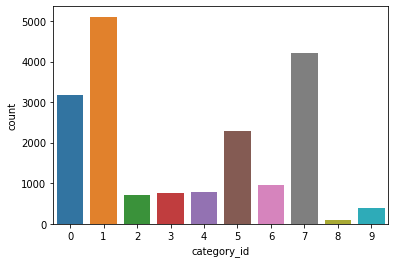

In [32]:
sns.countplot(x='category_id', data=train_pd)

sns.countplot(y='category_id',data=student)

hue는 색을 의미하는데, 데이터의 구분 기준을 정하여 색상을 통해 내용을 구분합니다.

<AxesSubplot:xlabel='category_id', ylabel='count'>

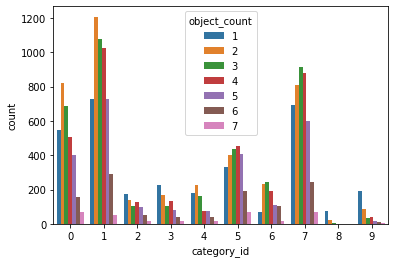

In [38]:
sns.countplot(x='category_id',data=train_pd,
              hue='object_count', 
              order=sorted(train_pd['category_id'].unique()),
              # 색상
              # palette='Set2'
             )

## 2. Categorical API

데이터의 통계량을 기본적으로 살펴보겠습니다.

- `count`
    - missing value
    
데이터가 정규분포에 가깝다면 평균과 표준 편차를 살피는 게 의미가 될 수 있습니다.

- `mean` (평균)
- `std` (표준 편차)

하지만 데이터가 정규분포에 가깝지 않다면 다른 방식으로 대표값을 뽑는 게 더 좋을 수 있습니다.

> 예시로 직원 월급 평균에서 임원급 월급은 빼야하듯?

분위수란 자료의 크기 순서에 따른 위치값으로 백분위값으로 표기하는 게 일반적입니다.

- 사분위수 : 데이터를 4등분한 관측값
    - `min`
    - `25%` (lower quartile)
    - `50%` (median)
    - `75%` (upper quartile)
    - `max`



In [39]:
train_pd.describe()

,image_id,category_id,area,iscrowd,id,x_min,x_center,x_max,y_min,y_center,y_max,w,h,bbox_count,object_count,fold
count,18502.000000,18502.000000,1.850200e+04,18502.0,18502.000000,18502.000000,18502.000000,18502.000000,18502.000000,18502.000000,18502.000000,18502.000000,18502.000000,18502.000000,18502.000000,18502.000000
mean,2437.339585,3.402443,9.271865e+04,0.0,11561.110691,383.771181,512.630770,641.490358,379.716933,505.653773,631.590612,257.719176,251.873679,13.265052,3.142255,2.497730
std,1408.583720,2.840131,1.349638e+05,0.0,6670.410974,244.100149,220.977142,242.924936,215.542897,196.726982,225.529927,204.624593,199.596981,11.234844,1.570352,1.116949
min,0.000000,0.000000,5.600000e-01,0.0,0.000000,0.000000,5.100000,10.200000,0.000000,6.350000,12.700000,0.700000,0.800000,1.000000,1.000000,1.000000
25%,1204.000000,1.000000,1.000399e+04,0.0,5777.250000,198.100000,370.212500,472.300000,226.800000,383.612500,476.200000,100.125000,93.800000,5.000000,2.000000,2.000000
50%,2457.000000,3.000000,3.884171e+04,0.0,11584.500000,361.100000,511.850000,663.100000,369.400000,507.800000,642.850000,201.100000,195.400000,10.000000,3.000000,2.000000
75%,3657.000000,7.000000,1.191443e+05,0.0,17291.750000,549.200000,655.437500,829.300000,519.400000,628.150000,798.000000,357.900000,358.825000,19.000000,4.000000,3.000000
max,4882.000000,9.000000,1.048064e+06,0.0,23143.000000,1011.300000,1017.500000,1023.900000,1011.500000,1017.600000,1023.900000,1023.800000,1023.800000,71.000000,7.000000,4.000000


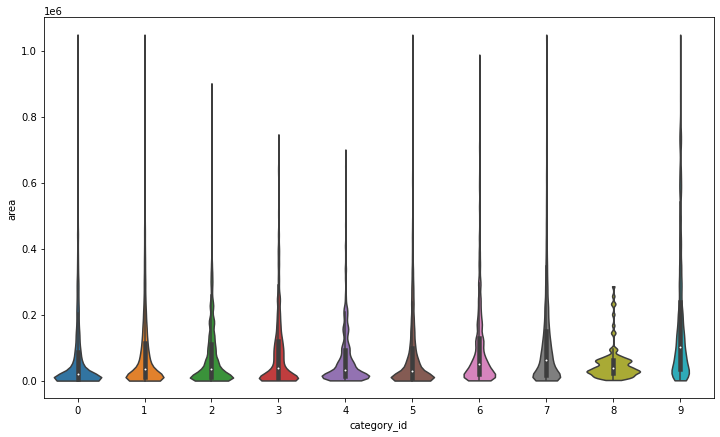

In [64]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
sns.violinplot(x='category_id', y='area', data=train_pd, ax=ax,
               order=sorted(train_pd['category_id'].unique()),
               #hue='object_count',
               #split=True,
               bw=0.1, cut=0
              )
plt.show()

/opt/conda/envs/detection/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 88.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

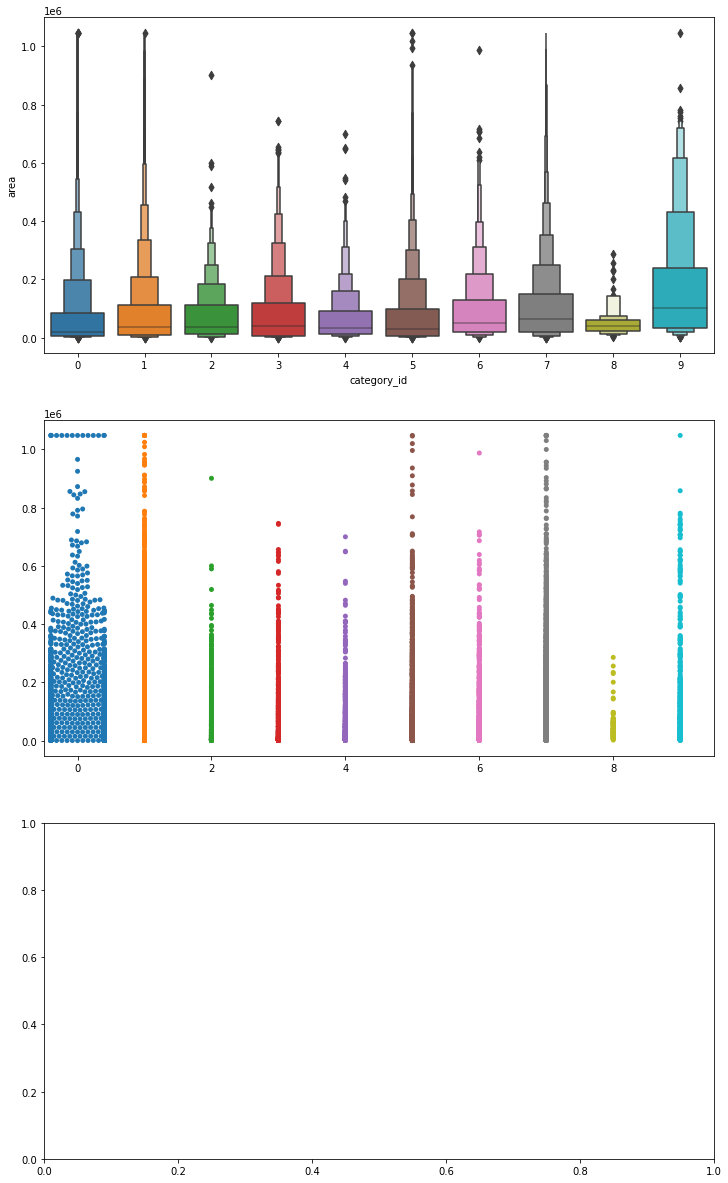

In [65]:
fig, axes = plt.subplots(3,1, figsize=(12, 21))
sns.boxenplot(x='category_id', y='area', data=train_pd, ax=axes[0],
               order=sorted(train_pd['category_id'].unique()))

sns.swarmplot(x='category_id', y='area', data=train_pd, ax=axes[1],
               order=sorted(train_pd['category_id'].unique()))

sns.stripplot(x='category_id', y='area', data=train_pd, ax=axes[2],
               order=sorted(train_pd['category_id'].unique()))
plt.show()

## 3. Distribution 

범주형/연속형을 모두 살펴볼 수 있는 분포 시각화를 살펴봅시다.

### 3-1. Univariate Distribution 

- `histplot` : 히스토그램
- `kdeplot` : Kernel Density Estimate
- `ecdfplot` : 누적 밀도 함수
- `rugplot` : 선을 사용한 밀도함수

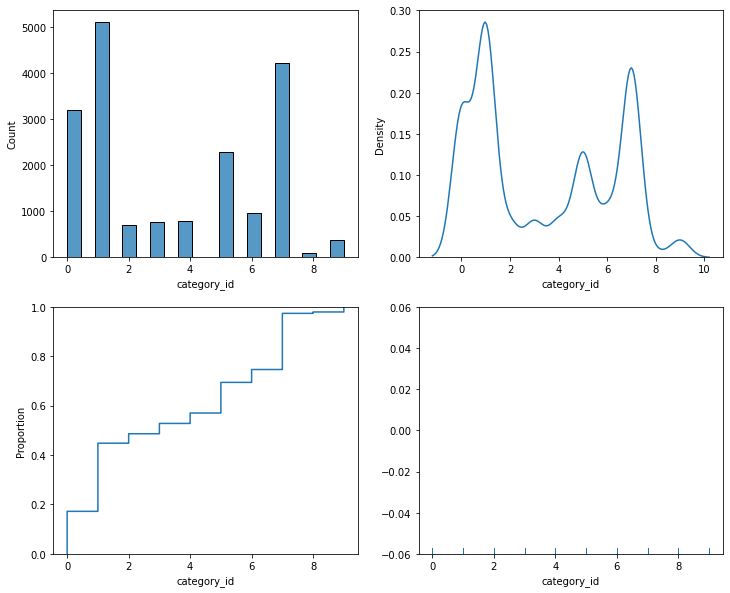

In [66]:
fig, axes = plt.subplots(2,2, figsize=(12, 10))
axes = axes.flatten()

sns.histplot(x='category_id', data=train_pd, ax=axes[0])

sns.kdeplot(x='category_id', data=train_pd, ax=axes[1])

sns.ecdfplot(x='category_id', data=train_pd, ax=axes[2])

sns.rugplot(x='category_id', data=train_pd, ax=axes[3])


plt.show()

이번엔 kdeplot을 살펴보겠습니다. kdeplot은 이미 violin에서 살펴보긴 했습니다.

연속확률밀도를 보여주는 함수로 seaborn의 다양한 smoothing 및 분포 시각화에 보조 정보로도 많이 사용합니다.

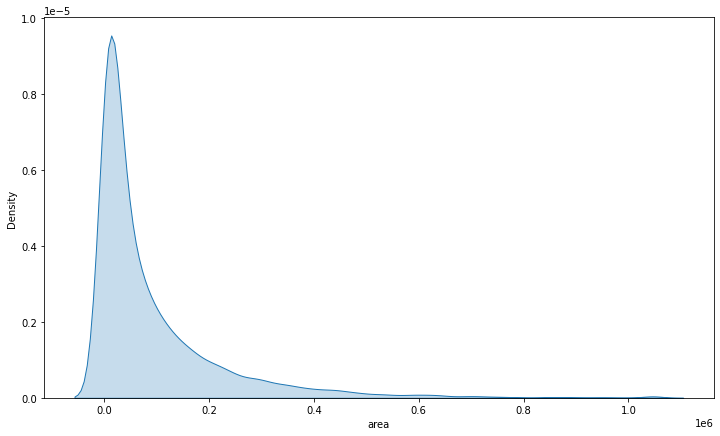

In [68]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.kdeplot(x='area', data=train_pd, ax=ax,
           fill=True)
plt.show()

`bw_method`를 사용하여 분포를 더 자세하게 표현할 수도 있습니다.

In [2]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.kdeplot(x='area', data=train_pd, ax=ax,
           fill=True, bw_method=0.0001)
plt.show()

NameError: name 'plt' is not defined

이번에도 다양한 분포를 살펴보겠습니다. histogram의 연속적 표현이라고 생각하면 편합니다.

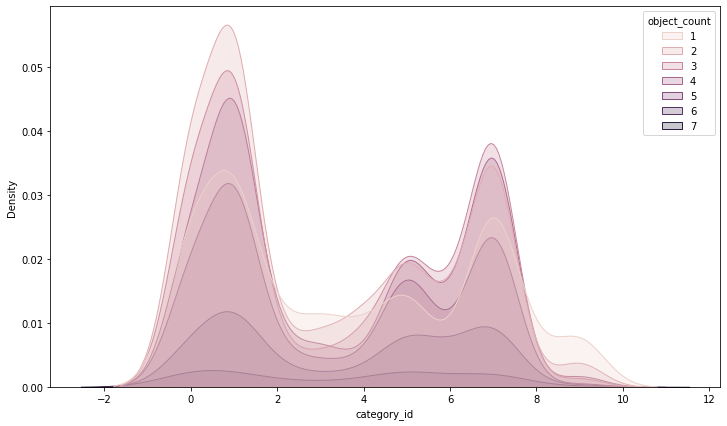

In [72]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.kdeplot(x='category_id', data=train_pd, ax=ax,
            fill=True, 
            hue='object_count', 
            hue_order=sorted(train_pd['category_id'].unique()))
plt.show()

여러 분포를 표현하기 위해 다음과 같은 방법을 사용할 수 있습니다

- `stack`
- `layer`
- `fill`

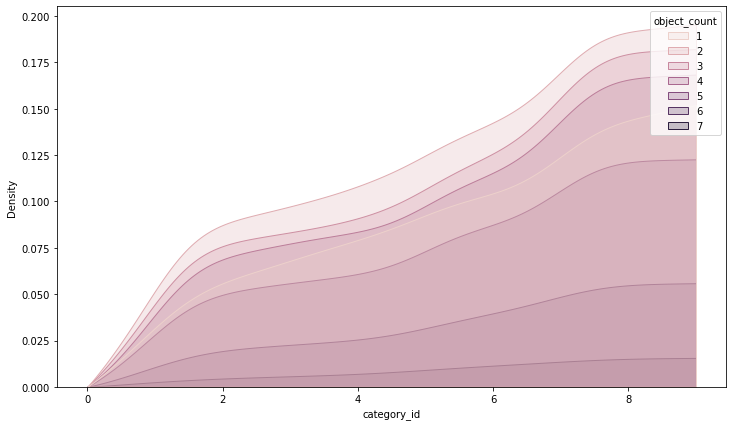

In [73]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.kdeplot(x='category_id', data=train_pd, ax=ax,
            fill=True, 
            hue='object_count', 
            hue_order=sorted(train_pd['category_id'].unique()),
            multiple="layer", # layer, stack, fill
            cumulative=True,
            cut=0
           )
plt.show()

### 3-2. Bivariate Distribution

이제는 2개 이상 변수를 동시에 분포를 살펴보도록 하겠습니다.

결합 확률 분포(joint probability distribution)를 살펴 볼 수 있습니다.

함수는 histplot과 kdeplot을 사용하고, 입력에 1개의 축만 넣는 게 아닌 2개의 축 모두 입력을 넣어주는 것이 특징입니다.

In [1]:
fig, axes = plt.subplots(1,2, figsize=(12, 7))
ax.set_aspect(1)

axes[0].scatter(train_pd['category_id'], train_pd['object_count'], alpha=0.2)

sns.histplot(x='category_id', y='object_count', 
             data=train_pd, ax=axes[1],
#              color='orange',
             cbar=False,
             bins=(10, 20), 
            )

plt.show()

NameError: name 'plt' is not defined